In [1]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

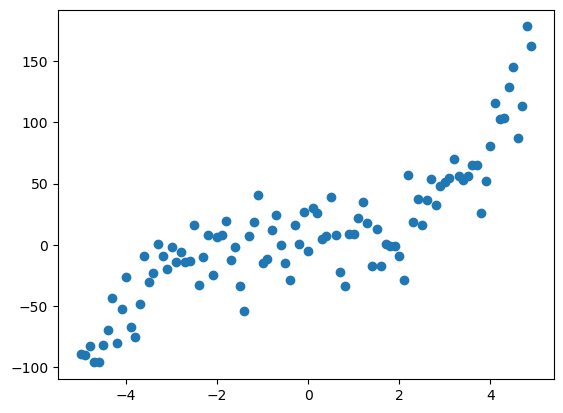

In [14]:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = (x**3)+(x**2)+(x**1)+3+y_noise

plt.scatter(x,y)

In [3]:
x1 = x
x2 = np.power(x1, 2)
x3 = np.power(x1 ,3)

In [4]:
x1_new = np.reshape(x1, (-1,1))
x2_new = np.reshape(x2, (-1,1))
x3_new = np.reshape(x3, (-1,1))

print(len(x1_new))

100


In [5]:
x_bias = np.ones((100,1))


In [6]:
x_new = np.append(x_bias, x1_new, axis=1)
x_new = np.append(x_new, x2_new, axis=1)
x_new = np.append(x_new, x3_new, axis=1)

In [7]:
x_new_transpose = np.transpose(x_new)

In [8]:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

In [9]:
temp1 = np.linalg.inv(x_new_transpose_dot_x_new)
temp2 = x_new_transpose.dot(y)

In [10]:
theta = temp1.dot(temp2)
theta

array([0.78576026, 4.42383539, 0.7992774 , 0.79460163])

In [11]:
beta0 = theta[0]
beta1 = theta[1]
beta2 = theta[2]
beta3 = theta[3]

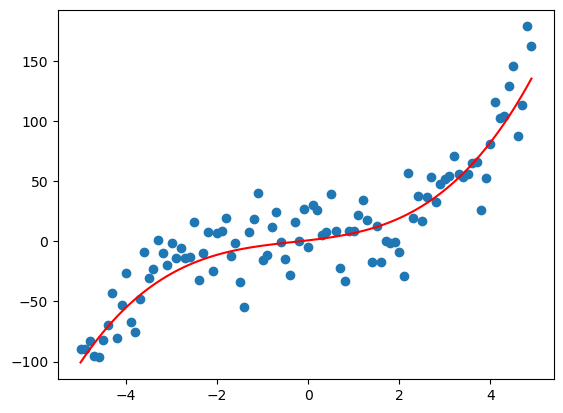

In [18]:
plt.scatter(x,y)
plt.plot(x,beta0 + beta1*x + beta2*x2 + beta3*x3, c = 'red')

In [20]:
#사인파 회귀와 비교

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

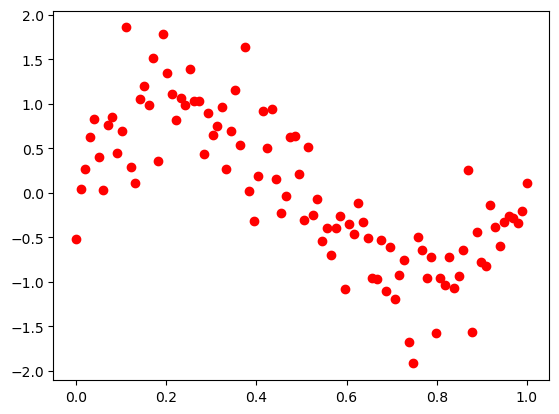

In [22]:
X = np.linspace(0, 1, 100)
Y = 1* np.sin(2*np.pi*X)

Noise = 0.4*np.random.normal(size=100)
Y_data = Y + Noise
plt.scatter(X, Y_data, c = 'r')

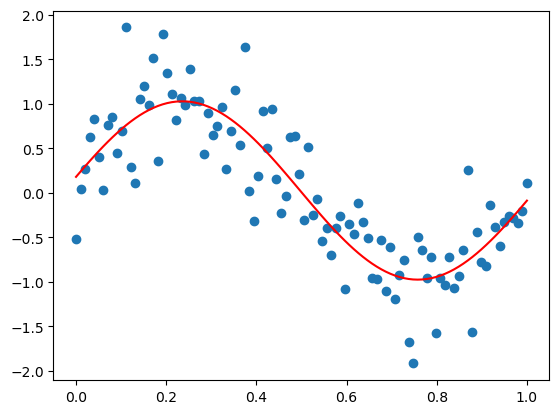

In [23]:
def calc_sine(x, a, b, c, d):
    return a* np.sin(b*(x+np.radians(c))) +d

popt, pcov = curve_fit(calc_sine, X, Y_data)

plt.scatter(X, Y_data)
plt.plot(X,calc_sine(X,*popt), c='r')

In [24]:
Accuracy = r2_score(Y_data, calc_sine(X,*popt))
print(Accuracy)

0.7642774415565823


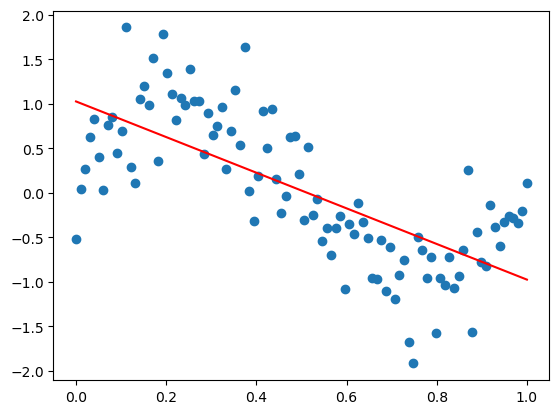

In [26]:
def calc_line(X, m, b):
    return b + x*m
popt, pcov = curve_fit(calc_line, X, Y_data)

plt.scatter(X, Y_data)
plt.plot(X, calc_line(X,*popt), c= 'r')

In [28]:
Accuracy = r2_score(Y_data, calc_line(X,*popt))
print("Accuracy of Linear Model",Accuracy)

Accuracy of Linear Model 0.5019954551107328


In [ ]:
s